In [148]:
# perform imports, set up paths

import os
import sys
from pathlib import Path

import pandas as pd
import openpyxl
from matplotlib import pyplot as plt

# the top level location of the project code
CURRENT_DIR_STR = os.path.abspath('')
CURRENT_DIR_PATH = Path(CURRENT_DIR_STR)
sys.path.append(CURRENT_DIR_PATH)
DATA_DIR_STR = os.path.join(CURRENT_DIR_STR, 'data')
DATA_DIR_PATH = Path(DATA_DIR_STR)
sys.path.append(DATA_DIR_PATH)

In [149]:
# read the producer exporter .json file into a dataframe

country_file_path = Path(os.path.join(DATA_DIR_STR, 'prod_exp.json'))
prod_exp_df = pd.DataFrame.transpose(pd.read_json(country_file_path))

#prod_exp_df

In [150]:
# load the coffee production data into a dataframe and reorganize the data

# Total production by all exporting countries in thousand 60kg bags
c_1a = "Total production by all exporting countries in thousand 60kg bags"
xl_1a = "1a - Total production.xlsx"

prod_path = Path(os.path.join(DATA_DIR_STR, xl_1a))
df1a=pd.read_excel(prod_path, engine="openpyxl").fillna(0)

# drop the superfluous rows
df1a.drop([0, 15, 23, 58], inplace=True)

# change the Country column names and reset the year names

df1a.rename(columns={"Crop year": "Country", "1990/91": "1990", "1991/92": "1991", "1992/93": "1992", "1993/94": "1993", "1994/95": "1994", "1995/96": "1995", "1996/97": "1996", "1997/98": "1997", "1998/99": "1998", "1999/00": "1999", "2000/01": "2000", "2001/02": "2001", "2002/03": "2002", "2003/04": "2003",
            "2004/05": "2004", "2005/06": "2005", "2006/07": "2006", "2007/08": "2007", "2008/09": "2008", "2009/10": "2009", "2010/11": "2010", "2011/12": "2011", "2012/13": "2012", "2013/14": "2013", "2014/15": "2014", "2015/16": "2015", "2016/17": "2016", "2017/18": "2017", "2018/19": "2018", "2019/20": "2019"}, inplace=True)

# sort the dataframes by Country
df1a.sort_values(by=["Country"], inplace=True)

# reset the index to iso code for df1a

iso_code = []

for i, drow in df1a.iterrows():
    for j, prow in prod_exp_df.iterrows():
        if drow["Country"] == prow["country"]:
            iso_code.append(j)
            break

df1a["iso_code"] = iso_code
df1a.set_index(["iso_code"], inplace=True)

#df1a

c:\Python\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [151]:
# load the coffee consumption data into a dataframe and reorganize the data

# Total production by all exporting countries in thousand 60kg bags
c_1b = "Domestic consumption by all exporting countries in thousand 60kg bags"
xl_1b = "1b - Domestic consumption.xlsx"

prod_path = Path(os.path.join(DATA_DIR_STR, xl_1b))
df1b = pd.read_excel(prod_path, engine="openpyxl").fillna(0)

# drop the superfluous rows
df1b.drop([0, 15, 23, 58], inplace=True)

# change the Country column names and reset the year names

df1b.rename(columns={"Crop year": "Country", "1990/91": "1990", "1991/92": "1991", "1992/93": "1992", "1993/94": "1993", "1994/95": "1994", "1995/96": "1995", "1996/97": "1996", "1997/98": "1997", "1998/99": "1998", "1999/00": "1999", "2000/01": "2000", "2001/02": "2001", "2002/03": "2002", "2003/04": "2003",
            "2004/05": "2004", "2005/06": "2005", "2006/07": "2006", "2007/08": "2007", "2008/09": "2008", "2009/10": "2009", "2010/11": "2010", "2011/12": "2011", "2012/13": "2012", "2013/14": "2013", "2014/15": "2014", "2015/16": "2015", "2016/17": "2016", "2017/18": "2017", "2018/19": "2018", "2019/20": "2019"}, inplace=True)

# sort the dataframes by Country
df1b.sort_values(by=["Country"], inplace=True)

# reset the index to iso code for df1b

iso_code = []

for i, drow in df1b.iterrows():
    for j, prow in prod_exp_df.iterrows():
        if drow["Country"] == prow["country"]:
            iso_code.append(j)
            break

df1b["iso_code"] = iso_code
df1b.set_index(["iso_code"], inplace=True)

#df1b

c:\Python\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [152]:
# load the coffee export data into a dataframe and reorganize the data

# Exports of all forms of coffee by all exporting countries in thousand 60kg bags
c_2a = "Exports of all forms of coffee by all exporting countries in thousand 60kg bags"
xl_2a = "2a - Exports - calendar year.xlsx"

prod_path = Path(os.path.join(DATA_DIR_STR, xl_2a))
df2a = pd.read_excel(prod_path, engine="openpyxl").fillna(0)

# drop the superfluous rows
df2a.drop([55], inplace=True)

# change the Country column name
df2a.rename(columns={"Calendar years": "Country"}, inplace=True)

# sort the dataframes by Country
df2a.sort_values(by=["Country"], inplace=True)

# reset the index to iso code for df2a

iso_code = []

for i, drow in df2a.iterrows():
    for j, prow in prod_exp_df.iterrows():
        if drow["Country"] == prow["country"]:
            iso_code.append(j)
            break

df2a["iso_code"] = iso_code
df2a.set_index(["iso_code"], inplace=True)

#df2a

In [153]:
# merge the production and export values into new columns in prod_exp_df

prod_exp_df['2019 Prod'] = df1a['2019']
prod_exp_df['2019 Cons'] = df1b['2019']
prod_exp_df['2019 Exp'] = df2a['2019']

#prod_exp_df

In [154]:
# read the importer exporter .json file into a dataframe

non_prod_file_path = Path(os.path.join(DATA_DIR_STR, 'imp_exp.json'))
imp_exp_df = pd.DataFrame.transpose(pd.read_json(non_prod_file_path))

#imp_exp_df

In [155]:
# load the coffee import data into a dataframe and reorganize the data

# Imports by selected importing countries in thousand 60-kg bags
c_2b = "Imports by selected importing countries in thousand 60-kg bags"
xl_2b = "2b - Imports.xlsx"
prod_path = Path(os.path.join(DATA_DIR_STR, xl_2b))
df2b = pd.read_excel(prod_path, engine="openpyxl").fillna(0)

# drop the superfluous rows
df2b.drop([0, 3, 36], inplace=True)

# change the Country column names
df2b.rename(columns={"Calendar years": "Country"}, inplace=True)

# sort the dataframes by Country and strip white space from country names
df2b["Country"] = df2b["Country"].apply(lambda x: x.strip())
df2b.sort_values(by=["Country"], inplace=True)

# reset the index to iso code for df2b

iso_code = []

for i, drow in df2b.iterrows():
    for j, prow in imp_exp_df.iterrows():
        if drow["Country"] == prow["country"]:
            iso_code.append(j)
            break

df2b["iso_code"] = iso_code
df2b.set_index(["iso_code"], inplace=True)

#df2b

In [156]:
# load the coffee reexport data into a dataframe and reorganize the data

# # Re-exports by selected importing  countries in thousand 60-kg bags
c_2c = "Re-exports by selected importing  countries in thousand 60-kg bags"
xl_2c = "2c - Re-exports.xlsx"
prod_path = Path(os.path.join(DATA_DIR_STR, xl_2c))
df2c = pd.read_excel(prod_path, engine="openpyxl").fillna(0)

# drop the superfluous rows
df2c.drop([0, 3, 36], inplace=True)

# change the Country column names
df2c.rename(columns={"Calendar years": "Country"}, inplace=True)

# sort the dataframes by Country and strip white space from country names
df2c.sort_values(by=["Country"], inplace=True)
df2c["Country"] = df2c["Country"].apply(lambda x: x.strip())

# reset the index to iso code for df2c
iso_code = []

for i, drow in df2c.iterrows():
    for j, prow in imp_exp_df.iterrows():
        if drow["Country"] == prow["country"]:
            iso_code.append(j)
            break

df2c["iso_code"] = iso_code
df2c.set_index(["iso_code"], inplace=True)

#df2c

##### Multi-time-zone producing countries:
Of the 6 coffee producing countries that have more than one time zone (Brazil, Mexico, Indonesia, Papua New Guinea, Ecuador, Democratic Republic of Congo), only 2 (Indonesia and Brazil) produce coffee in more than one time zone.

Indonesia produces coffee in all 3 time zones (UTC 7, 8, 9) and is the # 4 global producer, accounting for 5% of the global market.  A regional breakdown of production is difficult to find, but the 2 largest islands (Sumatra and Java) are also the commercial hub of Indonesia, so we will assign all the production and export to UTC+7.

Brazil is the #1 global producer, with around 32% of the global market, but 96% of the national production is in UTC-3.  The remaining 4% (2.3m bags) comes from Rondônia State on the border with Bolivia in UTC-4.  Therefore, for simplicity, 2.3m bags will be added to Bolivia's output, leaving 56m bags to be produced in UTC-3.  The vast majority of Brazil's population is in UTC-3, (the only significant population center in UTC-4 is the city of Manaus in Amazonia) so it is assumed that all domestic consumption will be assigned to that time zone.  Since Bolivia's domestic consumption is negligible, it is safe to assume that Rondônia's is also negligible.

The remaining 4 producers only produce coffee in:
- Mexico: UTC-6
- Papua New Guinea: UTC+10
- Ecuador: UTC-5
- DR Congo: UTC+2

In [157]:
# convert the single time zone countries to the numeric value time zone
for row, val in prod_exp_df.iterrows():
    if len(val["time_zones"]) == 1:
        prod_exp_df.at[row, "time_zones"] = val["time_zones"][0]

# set the multi-time zone countries to the chosen numeric value
prod_exp_df.at['BRA', 'time_zones'] = -3
prod_exp_df.at['IDN', 'time_zones'] = 7
prod_exp_df.at['MEX', 'time_zones'] = -6
prod_exp_df.at['PNG', 'time_zones'] = 10
prod_exp_df.at['ECU', 'time_zones'] = -5
prod_exp_df.at['COD', 'time_zones'] = 2

#prod_exp_df

In [158]:
# per above (see markup cell), reduce BRA by 2.3m bags and add that amount to BOL
# calculate the appropriate proportion for exports
rond_exp_prop = prod_exp_df.at['BOL', '2019 Exp'] / prod_exp_df.at['BOL', '2019 Prod']
tz_prod_adj = 2300
tz_exp_adj = tz_prod_adj * rond_exp_prop

# massage the data to move 2.3m bags from UTC-3 (BRA) to UTC-4 (BOL)
# assigns Rondônia State production, export and consumption to UTC-4
prod_exp_df.at['BRA', '2019 Prod'] -= tz_prod_adj 
prod_exp_df.at['BOL', '2019 Prod'] += tz_prod_adj
prod_exp_df.at['BRA', '2019 Exp'] -= tz_exp_adj
prod_exp_df.at['BOL', '2019 Exp'] += tz_exp_adj
prod_exp_df.at['BRA', '2019 Cons'] -= tz_prod_adj - tz_exp_adj
prod_exp_df.at['BOL', '2019 Cons'] += tz_prod_adj - tz_exp_adj

#prod_exp_df


##### Multi-time-zone importing countries:
Of the 3 coffee processing countries (import and re-export) that have more than one time zone (USA, Russian Federation, Spain) we don't have data per time zone.  However, we do have approximate population data.

The USA most likely imports and exports all coffee fron the East and West coasts: UTC-5 and UTC -8. Therefore, the import and export figures will be divided between the East and West coasts on an 80/20 split (approximate population distribution).  Consumption (import minus export) can be assumed to be evenly distributed by time zone population.

The Russian Federation likely does most of its import in the West (UTC 3) where the bulk of the population resides and where there are warm-water ports.   Consumption (import minus export) can be assumed to be evenly distributed by time zone population.

It can be assumed that Spain conducts all of it's coffee business and consumption on the mainland (UTC 1), with no significant activity happening in the Canary Islands (UTC 0)

In [159]:
# convert the single time zone countries to the numeric value time zone
for row, val in imp_exp_df.iterrows():
    if len(val["time_zones"]) == 1:
        imp_exp_df.at[row, "time_zones"] = val["time_zones"][0]

# set Spain to the chosen numeric value
imp_exp_df.at['ESP', 'time_zones'] = 1


##### USA population by Time Zone:
|Time Zone   |2017	     |2018       |UTC |Pop. %|
|------------|----------:|----------:|---:|-----:|
|USA Eastern |153,079,000|153,784,000|-5  |46.97%|
|USA Central |107,155,300|107,648,800|-6  |32.88%|
|USA Mountain|17,587,800 |17,668,800 |-7  |5.40% |
|USA Pacific |45,923,700 |46,135,200 |-8  |14.09%|
|USA Alaska	 |732,825    |736,200    |-9  |0.22% |
|USA Hawaii	 |1,416,795  |1,423,320  |-10 |0.43% |
|Total	     |325,895,420|327,396,320|    |      |	  

In [160]:
# create data for synthetic US time zone countries

us_tz_pop_factors = {
    "US-5": 0.4697,
    "US-6": 0.3288,
    "US-7": 0.054,
    "US-8": 0.1409,
    "US-9": 0.0022,
    "US-10": 0.0043
}

us_synth_countries = {
    'iso_code': ["US-5", "US-6", "US-7", "US-8", "US-9", "US-10"],
    'region': ['', '', '', '', '', ''],
    'country': ["US-5", "US-6", "US-7", "US-8", "US-9", "US-10"],
    'time_zones': [-5, -6, -7, -8, -9, -10]
}

##### Russian Federation population by Time Zone:
|Time Zone           |2018       |UTC |Pop. %|
|--------------------|----------:|---:|-----:|
|Russia Eastern	     |969,000 	 |2	  |0.66% |
|Russia Moscow	     |86,725,000 |3	  |59.29%|
|Russia Samara	     |12,064,000 |4	  |8.25% |
|Russia Yekaterinburg|20,986,000 |5	  |14.35%|
|Russia Omsk	     |1,978,000  |6   |1.35% |
|Russia Krasnoyarsk	 |12,854,000 |7	  |8.79% |
|Russia Irkutsk	     |3,393,000  |8	  |2.32% |
|Russia Yakutsk	     |2,794,000  |9	  |1.91% |
|Russia Vladivostok	 |3,471,000  |10  |2.37% |
|Russia Magadan	     |665,000 	 |11  |0.45% |
|Russia Kamchatka	 |368,000 	 |12  |0.25% |
|Russia Total	     |146,267,000| 	  |100%  |

In [161]:
# create data for synthetic RF time zone countries

rf_tz_pop_factors = {
    "RF2": 0.0066,
    "RF3": 0.5929,
    "RF4": 0.0825,
    "RF5": 0.1435,
    "RF6": 0.0135,
    "RF7": 0.0879,
    "RF8": 0.0232,
    "RF9": 0.0191,
    "RF10": 0.0237,
    "RF11": 0.0045,
    "RF12": 0.0025
}

rf_synth_countries = {
    'iso_code': ["RF2", "RF3", "RF4", "RF5", "RF6", "RF7", "RF8", "RF9", "RF10", "RF11", "RF12"],
    'region': ['', '', '', '', '', '', '', '', '', '', ''],
    'country': ["RF2", "RF3", "RF4", "RF5", "RF6", "RF7", "RF8", "RF9", "RF10", "RF11", "RF12"],
    'time_zones': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
}

In [162]:
# create synthetic countries for the USA
us_temp_df = pd.DataFrame(us_synth_countries)
us_temp_df.set_index(["iso_code"], inplace=True)

# create synthetic countries for the Russian Federation
rf_temp_df = pd.DataFrame(rf_synth_countries)
rf_temp_df.set_index(["iso_code"], inplace=True)

# concatentate the synthetic countries to imp_exp_df
frames = [imp_exp_df, us_temp_df, rf_temp_df]
imp_exp_df = pd.concat(frames)

# add new columns to the synthetic countries for the massaged data
us_temp_df['2019 Imp'] = range(len(us_temp_df))
us_temp_df['2019 Exp'] = range(len(us_temp_df))
us_temp_df['2019 Cons'] = range(len(us_temp_df))
rf_temp_df['2019 Imp'] = range(len(rf_temp_df))
rf_temp_df['2019 Exp'] = range(len(rf_temp_df))
rf_temp_df['2019 Cons'] = range(len(rf_temp_df))

# populate the new columns in the temporary dataframes
# note that imports and exports are only being assigned to the coastal time zones
# initialize the import export numbers - we'll change them later
for key, val in us_tz_pop_factors.items():
    us_temp_df.at[key, '2019 Imp'] = None  # set to NaN to avoid plotting a 0
    us_temp_df.at[key, '2019 Exp'] = None  # set to NaN to avoid plotting a 0
    us_temp_df.at[key, '2019 Cons'] = (df2b.at['USA', '2019'] - df2c.at['USA', '2019']) * val

for key, val in rf_tz_pop_factors.items():
    rf_temp_df.at[key, '2019 Imp'] = None  # set to NaN to avoid plotting a 0
    rf_temp_df.at[key, '2019 Exp'] = None  # set to NaN to avoid plotting a 0
    rf_temp_df.at[key, '2019 Cons'] = (df2b.at['RUS', '2019'] - df2c.at['RUS', '2019']) * val

# split the US import and export numbers between the East and West coast by population proportions
us_temp_df.at['US-5', '2019 Imp'] = df2b.at['USA', '2019'] * 0.8
us_temp_df.at["US-8", '2019 Imp'] = df2b.at['USA', '2019'] * 0.2
us_temp_df.at['US-5', '2019 Exp'] = df2c.at['USA', '2019'] * 0.8
us_temp_df.at["US-8", '2019 Exp'] = df2c.at['USA', '2019'] * 0.2

# assign the RF import and export numbers to the Western warm water ports
rf_temp_df.at["RF3", '2019 Imp'] = df2b.at['RUS', '2019']
rf_temp_df.at["RF3", '2019 Exp'] = df2c.at['RUS', '2019']

# delete the USA record
imp_exp_df = imp_exp_df.drop('USA')

# delete the Russian Federation record
imp_exp_df = imp_exp_df.drop('RUS')

#imp_exp_df

In [163]:
# merge the import and export values, and calculate consumption into new columns in imp_exp_df

imp_exp_df['2019 Imp'] = df2b['2019']
imp_exp_df['2019 Exp'] = df2c['2019']
imp_exp_df['2019 Cons'] = df2b['2019'] - df2c['2019']

# populate the new columns from the temporary dataframes
for thisKey in us_tz_pop_factors:
    imp_exp_df.at[thisKey, '2019 Imp'] = us_temp_df.at[thisKey, '2019 Imp']
    imp_exp_df.at[thisKey, '2019 Exp'] = us_temp_df.at[thisKey, '2019 Exp']
    imp_exp_df.at[thisKey, '2019 Cons'] = us_temp_df.at[thisKey, '2019 Cons']

for thisKey in rf_tz_pop_factors:
    imp_exp_df.at[thisKey, '2019 Imp'] = rf_temp_df.at[thisKey, '2019 Imp']
    imp_exp_df.at[thisKey, '2019 Exp'] = rf_temp_df.at[thisKey, '2019 Exp']
    imp_exp_df.at[thisKey, '2019 Cons'] = rf_temp_df.at[thisKey, '2019 Cons']

imp_exp_df

,region,country,time_zones,2019 Imp,2019 Exp,2019 Cons
AUT,Europe,Austria,1,1447.513664,274.161979,1173.351685
BEL,Europe,Belgium,1,6198.896527,5013.520188,1185.376339
BGR,Europe,Bulgaria,2,784.896715,361.830065,423.066650
HRV,Europe,Croatia,1,466.417527,85.911755,380.505772
CYP,Europe,Cyprus,2,133.224874,23.260300,109.964574
CZE,Europe,Czechia,1,1608.921470,766.220101,842.701369
DNK,Europe,Denmark,1,907.935154,129.792538,778.142616
EST,Europe,Estonia,2,147.848908,25.339064,122.509844
FIN,Europe,Finland,2,1515.473931,167.551473,1347.922458
FRA,Europe,France,1,7992.905036,1811.931562,6180.973474


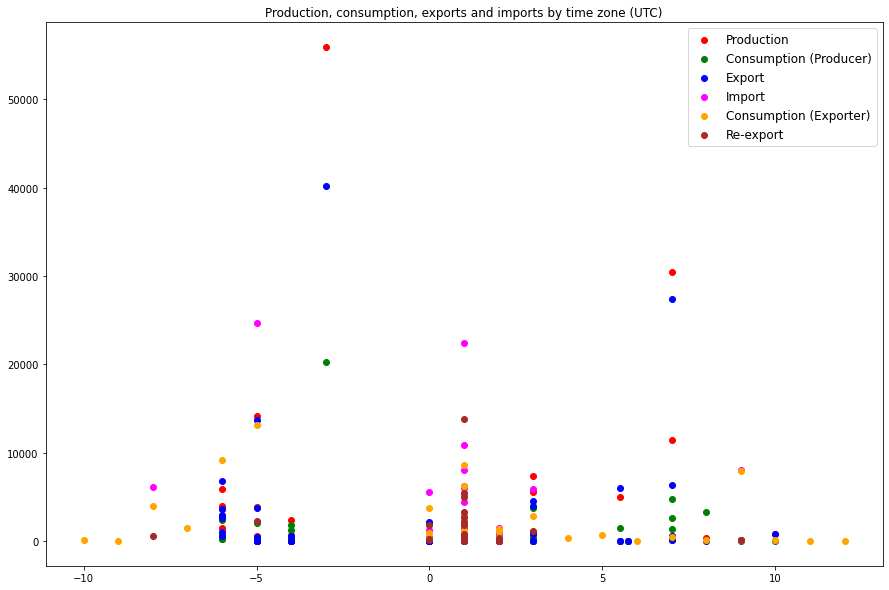

In [164]:
# plot the time zone scatter plot
#import numpy as np
fig, ax = plt.subplots(figsize=(15, 10))

plt.title("Production, consumption, exports and imports by time zone (UTC)")

plt.scatter(x=prod_exp_df['time_zones'], y=prod_exp_df['2019 Prod'], color='red', label='Production')
plt.scatter(x=prod_exp_df['time_zones'],
            y=prod_exp_df['2019 Cons'], color='green', label='Consumption (Producer)')
plt.scatter(x=prod_exp_df['time_zones'],
            y=prod_exp_df['2019 Exp'], color='blue', label='Export')
plt.scatter(x=imp_exp_df['time_zones'],
            y=imp_exp_df['2019 Imp'], color='magenta', label='Import')
plt.scatter(x=imp_exp_df['time_zones'],
            y=imp_exp_df['2019 Cons'], color='orange', label='Consumption (Exporter)')
plt.scatter(x=imp_exp_df['time_zones'],
            y=imp_exp_df['2019 Exp'], color='brown', label='Re-export')

plt.legend(loc=0, fontsize=12)

plt.show()